In [154]:
import os
os.chdir('C:\\Users\\Administrator\\Desktop\\Prudhvi\\Prudhvi\\Data Science\\Data')
#os.chdir('C:\\Users\\Admin\\Desktop\\Data')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

Reading the file

In [162]:
pd.options.display.max_columns = None
telco=pd.read_csv('Teleco_Cust_Attr.csv')
telco.head()
#print(telco.shape)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Checking the columns if any othem contains null or not

In [156]:
[print(col,' ',telco[col].isnull().sum()) for col in telco.columns if telco[col].isnull().sum()>0]

TotalCharges   11


[None]

#### Train test split
##### Important

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfitting.

In [163]:
y=pd.DataFrame(telco['Churn'])
telco=telco.drop('Churn',axis=1)

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [165]:
from sklearn.model_selection import StratifiedKFold
Kfold_X=StratifiedKFold(n_splits=2,random_state=0,shuffle=False)
Kfold_X.get_n_splits(telco,y)
for train_index,test_index in Kfold_X.split(telco,y):
    X_train, X_test=telco.loc[train_index],telco.loc[test_index]
    Y_tran, Y_test=y.loc[train_index],y.loc[test_index]
X_train.shape, X_test.shape

((3522, 20), (3521, 20))

In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(telco,y,test_size=0.30,random_state=42)
X_train.shape, X_test.shape

((4930, 20), (2113, 20))

In [167]:
## Selecting the Numeric datatype columns
Numeric_X_train=X_train.select_dtypes(include='int64')
Categorical_X_train=X_train.select_dtypes(include='object')

#### Threshold

In [168]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(Numeric_X_train)  # fit finds the features with zero variance
print('Total # of non constant features',sum(sel.get_support()))
sel.transform(Numeric_X_train)

Total # of non constant features 2


array([[ 0, 54],
       [ 0,  1],
       [ 0, 13],
       ...,
       [ 0, 12],
       [ 1, 12],
       [ 0, 26]], dtype=int64)

In [170]:
## Using Custom Code
constant_features = [
    feat for feat in Numeric_X_train.columns if Numeric_X_train[feat].std() == 0
]

len(constant_features)
Numeric_X_train.drop(labels=constant_features, axis=1, inplace=True)
Numeric_X_train.drop(labels=constant_features, axis=1, inplace=True)

Numeric_X_train.shape, Numeric_X_train.shape

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


((4930, 2), (4930, 2))

### Removing constant features for categorical variables

In [171]:
constant_features = [
    feat for feat in Categorical_X_train.columns if len(Categorical_X_train[feat].unique()) == 1
]

print(len(constant_features))
Categorical_X_train.drop(labels=constant_features, axis=1, inplace=True)
Categorical_X_train.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

0


C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


((4930, 20), (2113, 20))

In [ ]:
### Quasi Constant Features

In [172]:
quasi_constant_feat = []
for feature in Categorical_X_train.columns:

    # find the predominant value
    predominant = (Categorical_X_train[feature].value_counts() / np.float(
        len(Categorical_X_train))).sort_values(ascending=False).values[0]

    # evaluate predominant feature
    if predominant > 0.998:
        quasi_constant_feat.append(feature)

len(quasi_constant_feat)

0

In [173]:
## Duplicate Features
data_t=X_train.T
data_t.head()
data_t.duplicated().sum()
data_t[data_t.duplicated()] ## To visulize the duplicated rows
duplicated_features = data_t[data_t.duplicated()].index.values
duplicated_features
data_unique = data_t.drop_duplicates(keep='first').T
print(data_unique.shape)
# to find those columns in the original dataframe that were removed:
duplicated_features = [col for col in X_train.columns if col not in data_unique.columns]
duplicated_features 

(4930, 20)


[]

In [174]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
print(duplicated_feat)
print(len(set(duplicated_feat)))

0
10
[]
0


### Correlation

               SeniorCitizen    tenure
SeniorCitizen       1.000000  0.006708
tenure              0.006708  1.000000


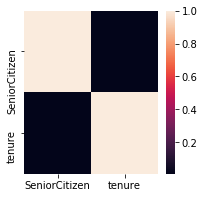

In [175]:
corr=Numeric_X_train.corr()
print(corr)
fig,ax=plt.subplots()
fig.set_size_inches(3,3)
sns.heatmap(corr)

In [176]:
## Brute Force Approach
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any other insight.

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print(len(set(corr_features)))
print(set(corr_features))

1
{'TotalCharges'}


In [177]:
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack()
# absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()
#print(corrmat)

,feature1,feature2,corr
0,TotalCharges,tenure,0.82643
1,tenure,TotalCharges,0.82643


In [178]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        print(grouped_feature_ls)
        grouped_feature_ls = grouped_feature_ls + list(correlated_block.feature2.unique()) + [feature]
        print(grouped_feature_ls)
        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))
print(grouped_feature_ls)
print(correlated_groups[0])

[]
['tenure', 'TotalCharges']
found 1 correlated groups
out of 20 total features
['tenure', 'TotalCharges']
       feature1 feature2     corr
0  TotalCharges   tenure  0.82643


### Mutual Information

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['SeniorCitizen', 'tenure'], dtype='object')

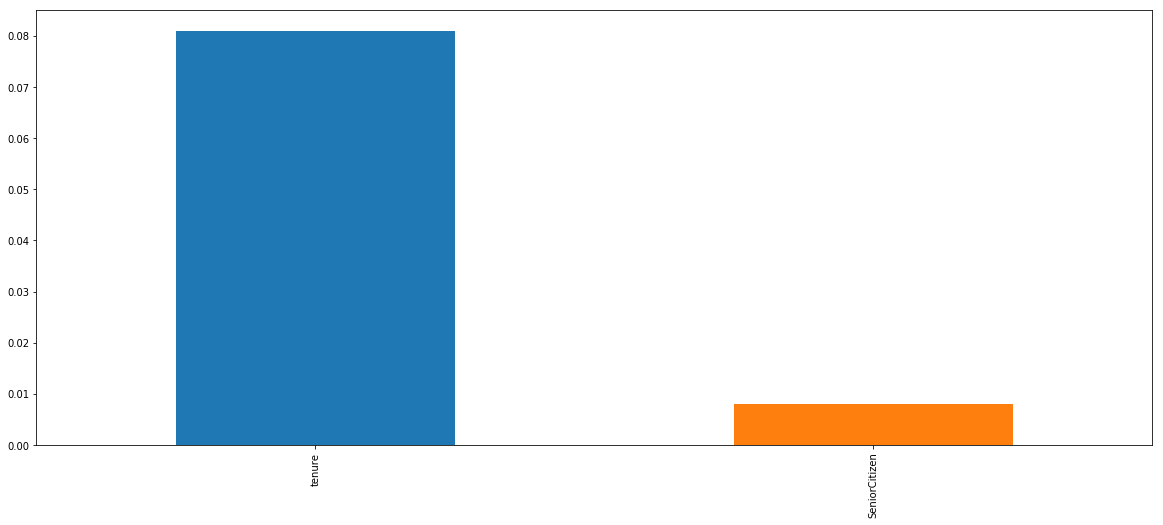

In [192]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

## For Classification
mi=mutual_info_classif(Numeric_X_train,y_train)
mi
mi=pd.Series(mi)
mi.index=Numeric_X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))
sel_ = SelectKBest(mutual_info_classif, k=2).fit(Numeric_X_train.fillna(0), y_train)
Numeric_X_train.columns[sel_.get_support()]
#sel_ = SelectPercentile(mutual_info_regression, percentile=0.1).fit(Numeric_X_train.fillna(0), y_train)
#Numeric_X_train.columns[sel_.get_support()]

## Fisher Score - chi-square implementation in sklearn

Compute chi-squared stats between each non-negative feature and class. 

- This score should be used to evaluate categorical variables in a classification task.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories. I explained this in more detail the introductory lecture of this section.

I will demonstrate how to select features using Fisher score using the titanic dataset from Kaggle.

In [199]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
# calculate the chi2 p_value between each of the variables
# and the target
# it returns 2 arrays, one contains the F-Scores which are then 
# evaluated against the chi2 distribution to obtain the pvalue
# the pvalues are in the second array, see below

f_score = chi2(Numeric_X_train.fillna(0), y_train)
print(f_score)

pvalues = pd.Series(f_score[1])
pvalues.index = Numeric_X_train.columns
pvalues.sort_values(ascending=False)


(array([   94.87613671, 10831.80754485]), array([2.02678431e-22, 0.00000000e+00]))


SeniorCitizen    2.026784e-22
tenure           0.000000e+00
dtype: float64

Keep in mind, that contrarily to MI, where we were interested in the higher MI values, for Fisher score, the smaller the p_value, the more significant the feature is to predict the target, in this case Survival in the titanic.

Then, from the above data, Sex is the most important feature, then PClass then Embarked. 

**Note**
One thing to keep in mind when using Fisher score or univariate selection methods, is that in very big datasets, most of the features will show a small p_value, and therefore look like they are highly predictive. This is in fact an effect of the sample size. So care should be taken when selecting features using these procedures. An ultra tiny p_value does not highlight an ultra-important feature, it rather indicates that the dataset contains too many samples. 

Finally, in this demonstration, I used chi2 over 3 categorical variables only. If the dataset contained several categorical variables, we could then combine this procedure with SelectKBest or SelectPercentile, as I did in the previous lecture.

## Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests (ANOVA). The methods based on F-test estimate the degree of linear dependency between two random variables. They assume a linear relationship between the feature and the target. These methods also assume that the variables follow a Gaussian distribution.

These may not always be the case for the variables in your dataset, so if looking to implement these procedure, you will need to corroborate these assumptions.

I will demonstrate how to select features based on univariate tests using sklearn on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle.

For the sake of the demonstration, I will assume that the variables show a linear relationship with the target, and that they are normally distributed. But when or if you choose to implement these selection procedure for your features, you will have to check that this is the case, to make sure you are implementing the right method.

In [200]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['SeniorCitizen', 'tenure'], dtype='object')

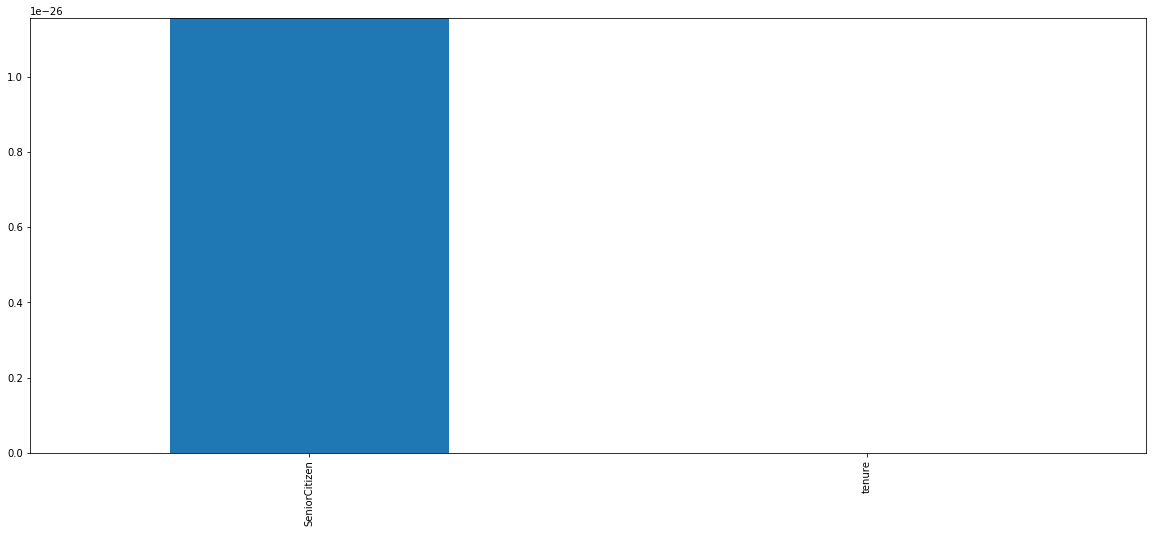

In [206]:
# calculate the univariate statistical measure between
# each of the variables and the target
# similarly to chi2, the output is the array of f-scores
# and an array of pvalues, which are the ones we will compare

univariate = f_classif(Numeric_X_train.fillna(0), y_train)
univariate
univariate = pd.Series(univariate[1])
univariate.index = Numeric_X_train.columns
univariate.sort_values(ascending=False, inplace=True)
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 8))
sel_ = SelectKBest(f_classif, k=2).fit(Numeric_X_train.fillna(0), y_train)
Numeric_X_train.columns[sel_.get_support()]

Remember that the lower the p_value, the most predictive the feature is in principle. There are a few features that do not seem to have predictive power according to this tests, which are those on the left with pvalues above 0.05. Given that typically in statistics one uses a pvalue of 0.05 as a cut-off, I am inclined to believe that those features with pvalue > 0.05 are indeed not important. However, keep in mind that this test assumes a linear relationship, so it might also be the case that the feature is related to the target but not in a linear manner.

Further investigation is needed if we want to know the true nature of the relationship between feature and target.

Similarly to what I mentioned in the previous lecture, in big datasets it is not unusual that the pvalues of the different features are really small. This does not say as much about the relevance of the feature. Mostly it indicates that it is a big the dataset.

Once again, where we put the cut-off to select features is a bit arbitrary. One way is to select the top 10, 20 features. Alternatively, the top 10th percentile. For this, you can use anova in combination with SelectKBest or SelectPercentile from sklearn. See below.

## Univariate roc-auc or mse

This procedure works as follows:

- First, it builds one decision tree per feature, to predict the target
- Second, it makes predictions using the decision tree and the mentioned feature
- Third, it ranks the features according to the machine learning metric (roc-auc or mse)
- It selects the highest ranked features

I will demonstrate how to select features based on univariate roc-auc or univariate mse information on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error
roc_values = []
for feature in Numeric_X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(Numeric_X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(Numeric_X_train[feature].fillna(0).to_frame())
    #roc_values.append(roc_auc_score(y_train, y_scored[:, 1]))
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False)
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random
len(roc_values[roc_values > 0.5])

98 of 112  features show a predictive performance higher than 0.5. This means that we could remove 14 features from this dataset using this method.

You can of course tune the parameters of the Decision Tree and get better predictions. I leave this to you. But remember that the key here is not to make ultra predictive Decision Trees, rather to use them to screen quickly for important features. So I would recommend you don't spend too much time tuning. Doing cross validation with sklearn should be very straight forward  to get a more accurate measure of the roc-auc per feature.

Once again, where we put the cut-off to select features is a bit arbitrary, other than > 0.5. It will be up to you.

In [ ]:
# loop to build a tree, make predictions and get the mse
# for each feature of the train set
mse_values = []
for feature in X_train.columns:
    clf = DecisionTreeRegressor()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    mse_values.append(mean_squared_error(y_test, y_scored))
# let's add the variable names and order it for clearer visualisation
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=False)
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

Remember that for regression, the smaller the mse, the better the model performance is. So in this case, we need to select from the right to the left.

For the mse, where to put the cut-off is arbitrary as well. It depends on how many features you would like to end up with.

### Step forward feature selection

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d.

Step forward feature selection starts by evaluating all features individually and selects the one that generates the best performing algorithm, according to a pre-set evaluation criteria. In the second step, it evaluates all possible combinations of the selected feature and a second feature, and selects the pair that produce the best performing algorithm based on the same pre-set criteria.

The pre-set criteria can be the roc_auc for classification and the r squared for regression for example. 

This selection procedure is called greedy, because it evaluates all possible single, double, triple and so on feature combinations. Therefore, it is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

There is a special package for python that implements this type of feature selection: mlxtend.

In the mlxtend implementation of the step forward feature selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features. 

This is somewhat arbitrary because we may be selecting a subopimal number of features, or likewise, a high number of features. 

Here I will use the Step Forward feature selection algorithm from mlxtend in a classification (Paribas) and regression (House Price) dataset.

Fixing the missing values using the Stratified mean value imputation

In [219]:
Mean_No_TotalCharges=telco.groupby('gender')['TotalCharges'].mean()['Female']
Mean_Yes_TotalCharges=telco.groupby('gender')['TotalCharges'].mean()['Male']

In [220]:
telco.loc[(telco['TotalCharges'].isnull()) & (telco['gender']=='Female'),['TotalCharges']]=Mean_No_TotalCharges
telco.loc[(telco['TotalCharges'].isnull()) & (telco['gender']=='Male'),['TotalCharges']]=Mean_Yes_TotalCharges

Dropping the columns which dont explain much variance

In [221]:
telco.drop(['customerID'],axis=1,inplace=True)

In [222]:
telco.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [223]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


Data type conversion

In [224]:
telco['SeniorCitizen']=telco['SeniorCitizen'].astype('object')

In [225]:
telco_backup=telco

In [226]:
from sklearn.preprocessing import LabelBinarizer
from collections import defaultdict
import pandas as pd
encoding=defaultdict(LabelBinarizer)
columns_nominal=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod']
for i in columns_nominal:
    encoded_df=pd.DataFrame()
    d=pd.DataFrame(encoding[i].fit_transform(telco[i]))
    test_column=d.columns.values
    list1=[i+'_'+str(j) for j in test_column]
    d.columns=list1
    encoded_df=pd.concat([encoded_df,d],axis=1)
    telco.drop(i,axis=1, inplace=True)
    telco=pd.concat([telco,encoded_df],axis=1)

In [229]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
y['Churn']=lb_make.fit_transform(y["Churn"])
lb_contract = LabelEncoder()
telco['Contract']=lb_make.fit_transform(telco["Contract"])

In [230]:
telco.head()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,gender_0,Partner_0,Dependents_0,PhoneService_0,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,PaperlessBilling_0,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0,1,0,29.85,29.85,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
1,0,34,1,56.95,1889.50,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1
2,0,2,0,53.85,108.15,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
3,0,45,1,42.30,1840.75,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0
4,0,2,0,70.70,151.65,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [218]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
#enc.fit(telco['gender_lb'])
enc.fit(telco['MultipleLines_LE'].values.reshape(-1,1))
X=enc.transform(telco['MultipleLines_LE'].values.reshape(-1,1)).toarray()


In [231]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(telco,y,test_size=0.30,random_state=42)
X_train.shape, X_test.shape

((4930, 38), (2113, 38))

In [ ]:
## Step forward selection

In [236]:
# step forward feature selection
# I indicate that I want to select 10 features from
# the total, and that I want to select those features
# based on the optimal roc_auc

sfs1 = SFS(RandomForestClassifier(n_jobs=4), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train.fillna(0)), y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
C:\Users\Administrator\Ana

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   27.1s finished

[2018-11-16 04:25:37] Features: 1/10 -- score: 0.737941718847563C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_t

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   26.4s finished

[2018-11-16 04:26:04] Features: 2/10 -- score: 0.789826496913545C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_t

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Ana

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Ana

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   21.4s finished

[2018-11-16 04:28:52] Features: 9/10 -- score: 0.813092355749566C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_t

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

In [237]:
selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['Contract', 'PhoneService_0', 'MultipleLines_1', 'InternetService_0',
       'InternetService_1', 'InternetService_2', 'OnlineSecurity_0',
       'OnlineSecurity_2', 'PaymentMethod_2', 'PaymentMethod_3'],
      dtype='object')

In [232]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [235]:
# evaluate performance of algorithm built
# using selected features
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
run_randomForests(X_train.fillna(0),
                  X_test.fillna(0),
                  y_train, y_test)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Train set
Random Forests roc-auc: 0.8457613400391941
Test set
Random Forests roc-auc: 0.8541509600559666


### Exhaustive feature selection

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d.

In an exhaustive feature selection the best subset of features is selected, over all possible feature subsets, by optimizing a specified performance metric for a certain machine learning algorithm. For example, if the classifier is a logistic regression and the dataset consists of 4 features, the algorithm will evaluate all **15** feature combinations as follows:

- all possible combinations of 1 feature
- all possible combinations of 2 features
- all possible combinations of 3 features
- all the 4 features

and select the one that results in the best performance (e.g., classification accuracy) of the logistic regression classifier.

This is another greedy algorithm as it evaluates all possible feature combinations. It is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

There is a special package for python that implements this type of feature selection: mlxtend.

In the mlxtend implementation of the exhaustive feature selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features. 

This is somewhat arbitrary because we may be selecting a subopimal number of features, or likewise, a high number of features. 

Here I will use the Exhaustive feature selection algorithm from mlxtend in a classification (Paribas) and regression (House Price) dataset.

In [239]:
# exhaustive feature selection
# I indicate that I want to select 10 features from
# the total, and that I want to select those features
# based on the optimal roc_auc

# in order to shorter search time for the demonstration
# i will ask the algorithm to try all possible 1,2,3 and 4
# feature combinations from a dataset of 4 features

# if you have access to a multicore or distributed computer
# system you can try more greedy searches

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs1 = EFS(RandomForestClassifier(n_jobs=4, random_state=0), 
           min_features=1,
           max_features=4, 
           scoring='roc_auc',
           print_progress=True,
           cv=2)

efs1 = efs1.fit(np.array(X_train[X_train.columns[0:4]].fillna(0)), y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConvers

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
Features: 15/15

In [241]:
selected_feat= X_train.columns[list(efs1.best_idx_)]
selected_feat

Index(['SeniorCitizen', 'tenure', 'Contract', 'MonthlyCharges'], dtype='object')

## Lasso regularisation

Regularisation consists in adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model and in other words to avoid overfitting. In linear model regularisation, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularisation, Lasso or l1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

I will demonstrate how to select features using the Lasso regularisation on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle.

In [245]:
# here I will do the model fitting and feature selection
# altogether in one line of code

# first I specify the Logistic Regression model, and I
# make sure I select the Lasso (l1) penalty.

# Then I use the selectFromModel object from sklearn, which
# will select in theory the features which coefficients are non-zero
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(X_train.fillna(0), y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [246]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
        True, False, False,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True])

In [247]:
# Now I make a list with the selected features
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 38
selected features: 27
features with coefficients shrank to zero: 10


In [248]:
# the number of features which coefficient was shrank to zero:
np.sum(sel_.estimator_.coef_ == 0)

10

In [249]:
# we can identify the removed features like this:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['Partner_0', 'MultipleLines_1', 'MultipleLines_2', 'InternetService_2',
       'OnlineBackup_2', 'DeviceProtection_1', 'DeviceProtection_2',
       'TechSupport_2', 'StreamingTV_0', 'PaymentMethod_0'],
      dtype='object')

#### Applying  KNN

In [228]:
from sklearn.neighbors import KNeighborsClassifier
KNNC=KNeighborsClassifier(n_neighbors=17)
KNNC.fit(X_train,y_train)
KNNC_Train_Prediction=KNNC.predict(X_train)
KNNC_Test_Prediction=KNNC.predict(X_test)

print(KNNC.get_params)

from sklearn.metrics import confusion_matrix
CF_train=confusion_matrix(y_train,KNNC_Train_Prediction)
CF_test=confusion_matrix(y_test,KNNC_Test_Prediction)
print('Confusion Metrics:\n',CF_train)

import numpy as np
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score
train_accuracy=accuracy_score(y_train,KNNC_Train_Prediction)
test_accuracy=accuracy_score(y_test,KNNC_Test_Prediction)
print('Train accuracy:',train_accuracy)
print('Test accuracy:',test_accuracy)

train_precision=precision_score(y_train,KNNC_Train_Prediction,average='macro')
test_precision=precision_score(y_test,KNNC_Test_Prediction,average='macro')
print('Train precision:',train_precision)
print('Test precision:',test_precision)

train_recall=recall_score(y_train,KNNC_Train_Prediction,average='macro')
test_recall=recall_score(y_test,KNNC_Test_Prediction,average='macro')
print('Train recall:',train_recall)
print('Test recall:',test_recall)


#train_roc_auc_score=roc_auc_score(y_train,KNNC_Train_Prediction)
#test_roc_auc_score=roc_auc_score(y_test,KNNC_Test_Prediction)
#print('Train roc score:',train_roc_auc_score)
#print('Test roc score:',test_roc_auc_score)


<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')>
Confusion Metrics:
 [[3386  249]
 [ 748  547]]
Train accuracy: 0.7977687626774848
Test accuracy: 0.7870326549929011
Train precision: 0.7531236856755962
Test precision: 0.7433297515548174
Train recall: 0.6769465673179567
Test recall: 0.6691876484345461


##### ROC Curve

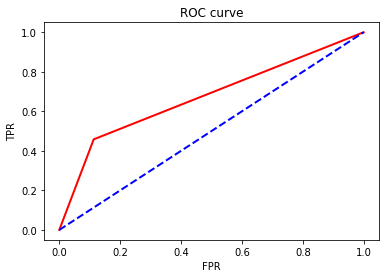

In [198]:
# Pre requisite:
#We should convert the output variable into numeric using lable_binarize

from sklearn.neighbors import KNeighborsClassifier
KNNC=KNeighborsClassifier()
KNNC.fit(X_train,y_train)
KNNC_Train_Prediction=KNNC.predict(X_train)
KNNC_Test_Prediction=KNNC.predict(X_test)

from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(y_test,KNNC_Test_Prediction,drop_intermediate=False)

# Plotting the ROC graph

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### roc_curve_scores

In [199]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,KNNC_Test_Prediction)

0.6725638622301009

### Grid Search

In [210]:
score=['precision']
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
scores=['precision', 'recall','f1','roc_auc']
for score in scores:
    print('***********************************',score,'***********************************')
    parameters={'n_neighbors':[5,9,13,15]}
    KNNGridSearch=GridSearchCV(KNNC,parameters,cv=3,scoring='%s_macro' % score)
    KNNGridSearch.fit(X_train,y_train)
    print('Best Parameters:',KNNGridSearch.best_params_)
    print('CV Results Keys: \n',KNNGridSearch.cv_results_.keys())
    print('CV Results: \n',KNNGridSearch.cv_results_)
    #print('CV Results values: \n',KNNGridSearch.cv_results_.values())

*********************************** precision ***********************************
Best Parameters: {'n_neighbors': 13}
CV Results Keys: 
 dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])
CV Results: 
 {'mean_fit_time': array([0.02233458, 0.0196677 , 0.0196677 , 0.02000125]), 'std_fit_time': array([4.71420930e-03, 4.71426560e-04, 9.42853099e-04, 1.12391596e-07]), 'mean_score_time': array([0.0336686 , 0.0346686 , 0.03733548, 0.0373354 ]), 'std_score_time': array([0.00235713, 0.00094297, 0.00047148, 0.00047154]), 'param_n_neighbors': masked_array(data=[5, 9, 13, 15],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 5}, {'n_neighbor

ValueError: 'roc_auc_macro' is not a valid scoring value. Valid options are ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']